In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('../Datasets/data2.csv')

In [17]:
df.isna()

,Temperature (°C),Ice Cream Sales (units)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

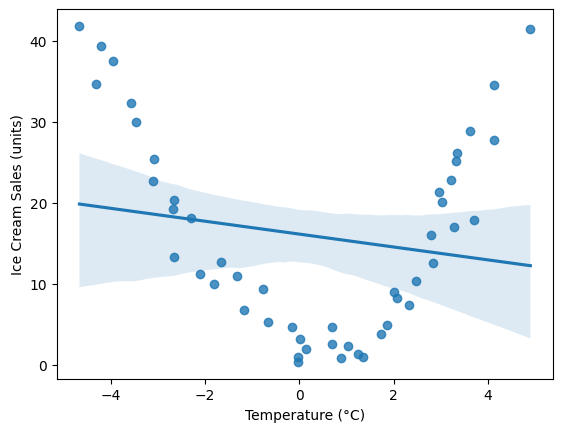

In [18]:
sns.regplot(x='Temperature (°C)',y='Ice Cream Sales (units)', data=df)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline

In [20]:
X=df[['Temperature (°C)']]
Y=df['Ice Cream Sales (units)']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

Metrics
MSE: 189.61334075159166
MAE: 11.523161634815132
R2: -5.6026672612612405


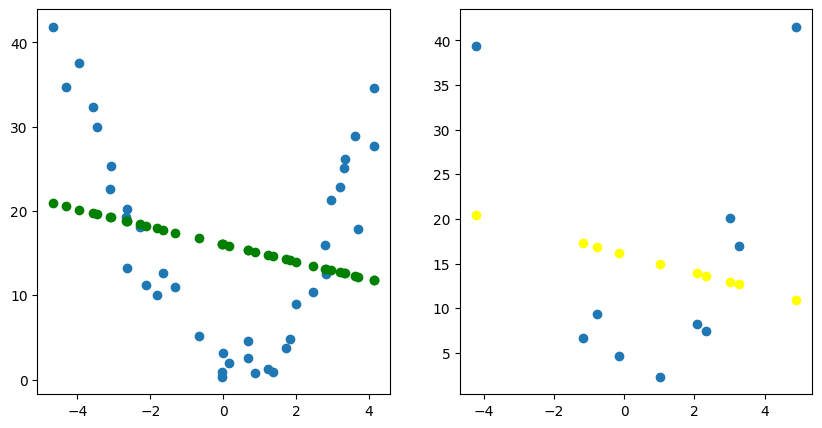

Metrics
MSE: 6.899773411988046
MAE: 2.2409549001589175
R2: 96.15726154649192


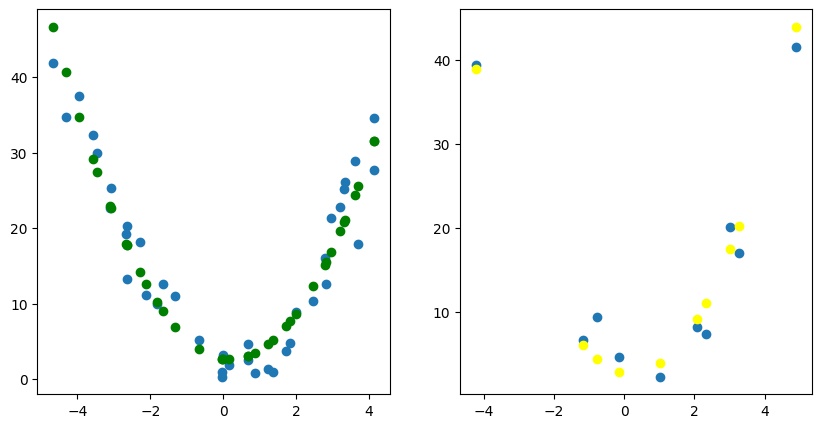

Metrics
MSE: 11.576719907430807
MAE: 2.609503932489947
R2: 93.55249743759934


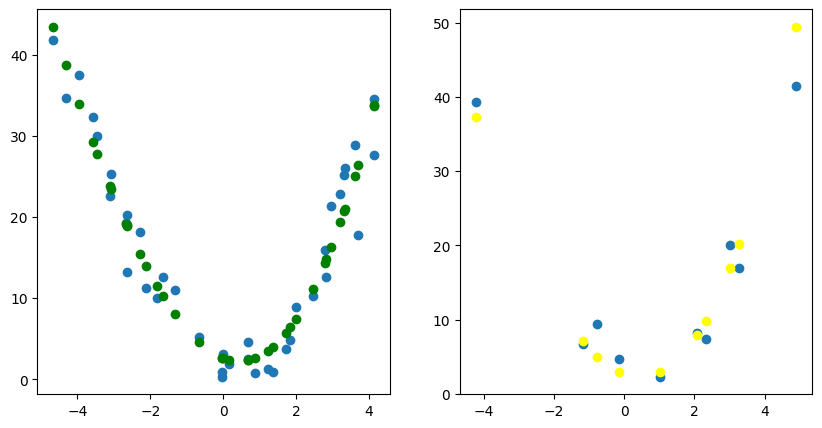

Metrics
MSE: 7.730126912199526
MAE: 2.1710914358692683
R2: 95.69480703751867


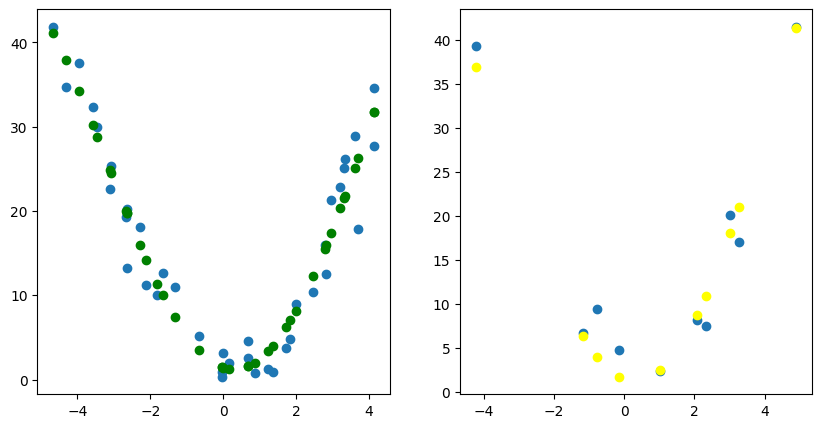

Metrics
MSE: 11.847450497644093
MAE: 2.7676717045112205
R2: 93.401717580431


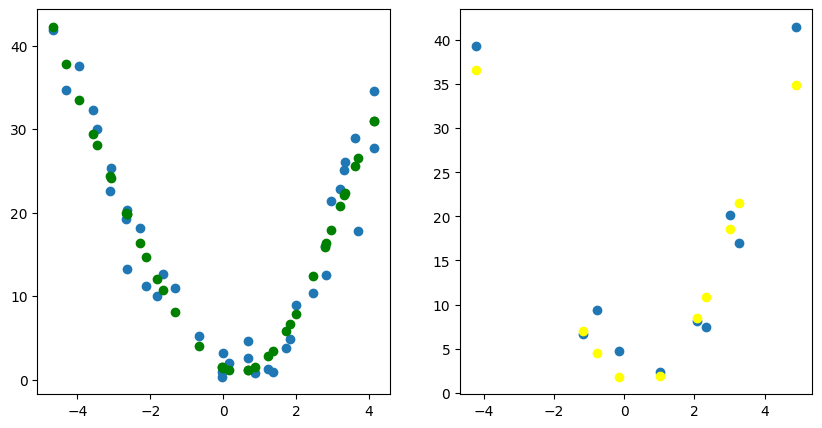

Metrics
MSE: 70.0526470972324
MAE: 4.3749610421168015
R2: 60.98509549562117


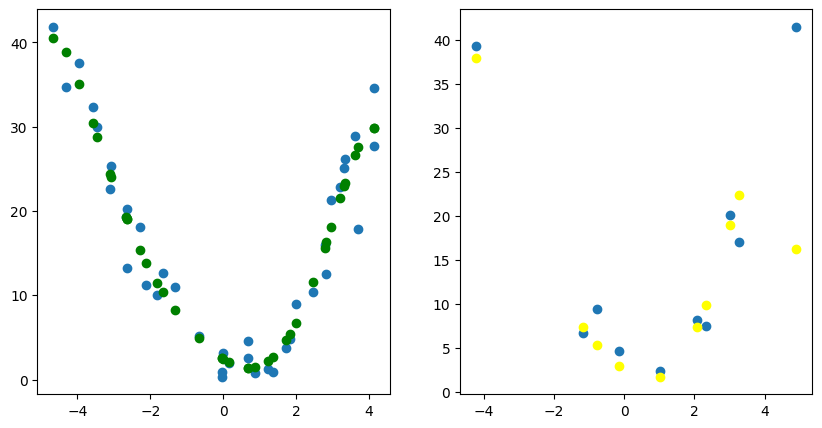

Metrics
MSE: 24.343218314023673
MAE: 3.1615071816665647
R2: 86.44236331950972


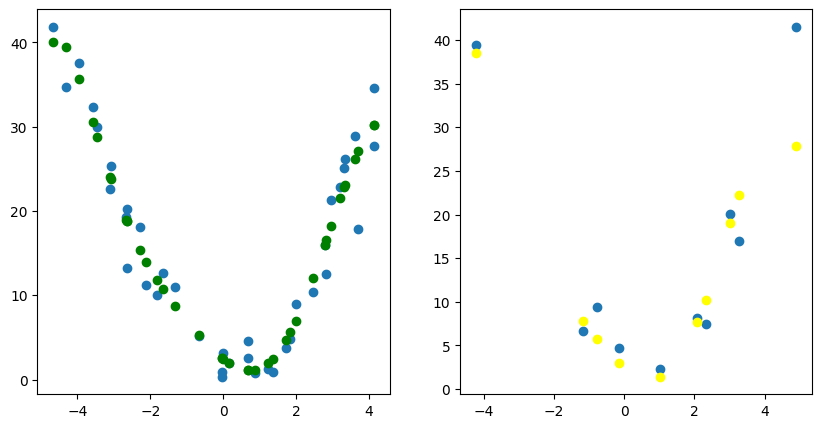

Metrics
MSE: 102.86068889657682
MAE: 4.957184427608024
R2: 42.71308621665045


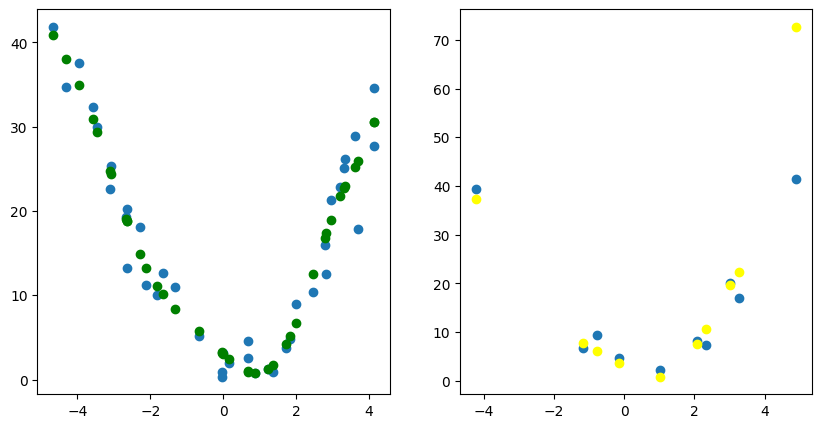

Metrics
MSE: 68.94674142200253
MAE: 4.3638720624728204
R2: 61.60101518028428


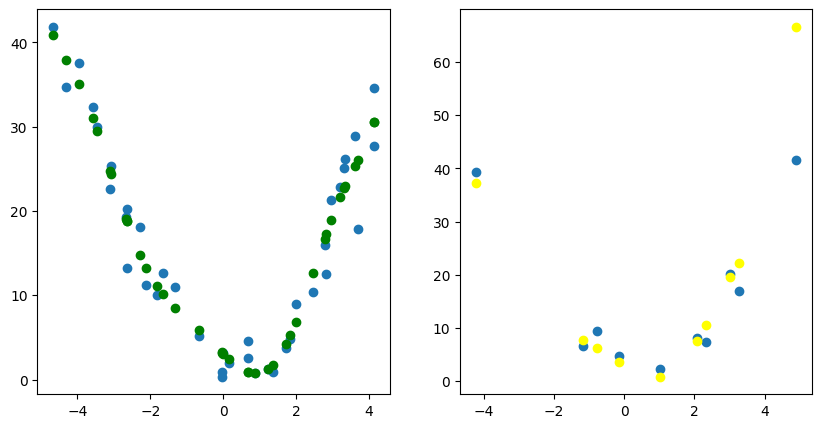

Metrics
MSE: 16749.34797787804
MAE: 43.254709934515674
R2: -9228.330033845923


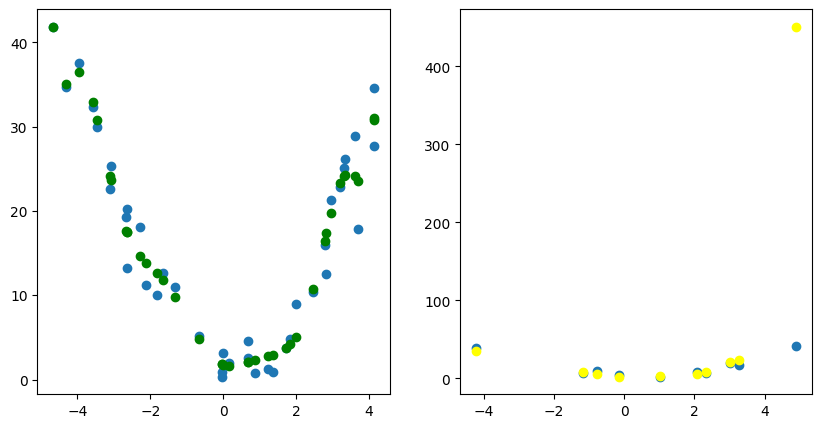

Metrics
MSE: 37052.13788499531
MAE: 63.20350897625336
R2: -20535.7030200402


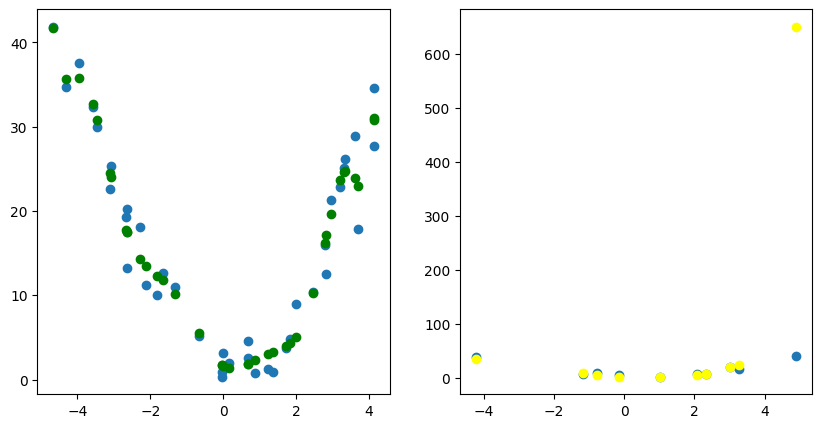

In [25]:
for Degree in range(1,12):
    model=Pipeline(steps=[
    ("PolynomialFeatures",PolynomialFeatures(degree=Degree)),
    ("LinearRegression",LinearRegression())
        ])
    model.fit(Xtrain,Ytrain)
    ypred=model.predict(Xtest)
    print('Metrics')
    print(f'MSE: {mean_squared_error(Ytest, ypred)}')
    print(f'MAE: {mean_absolute_error(Ytest, ypred)}')
    print(f'R2: {r2_score(Ytest, ypred) * 100 }')
    fig,(ax1,ax2)=plt.subplots(1,2 ,figsize=(10,5))
    ax1.scatter (Xtrain ,Ytrain)
    ax1.scatter(Xtrain,model.predict(Xtrain) ,color='green', linestyle = 'solid')
    ax2.scatter(Xtest,Ytest)
    ax2.scatter(Xtest,ypred ,color='yellow',linestyle = 'solid')
    plt.show()
